In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
from tensorflow import keras
import numpy as np

input_shape = (150, 150, 3)

input_1 = keras.layers.Input(shape=input_shape)
input_2 = keras.layers.Input(shape=input_shape)

conv_1 = keras.layers.Conv2D(32, (2, 2), activation='relu')(input_1)
pool_1 = keras.layers.MaxPooling2D((2, 2))(conv_1)
conv_2 = keras.layers.Conv2D(64, (4, 4), activation='relu')(pool_1)
pool_2 = keras.layers.MaxPooling2D((2, 2))(conv_2)
conv_3 = keras.layers.Conv2D(128, (6, 6), activation='relu')(pool_2)
pool_3 = keras.layers.MaxPooling2D((2, 2))(conv_3)
flatten_1 = keras.layers.Flatten()(pool_3)

conv_4 = keras.layers.Conv2D(32, (2, 2), activation='relu')(input_2)
pool_4 = keras.layers.MaxPooling2D((2, 2))(conv_4)
conv_5 = keras.layers.Conv2D(64, (4, 4), activation='relu')(pool_4)
pool_5 = keras.layers.MaxPooling2D((2, 2))(conv_5)
conv_6 = keras.layers.Conv2D(128, (6, 6), activation='relu')(pool_5)
pool_6 = keras.layers.MaxPooling2D((2, 2))(conv_6)
flatten_2 = keras.layers.Flatten()(pool_6)

concat = keras.layers.Concatenate()([flatten_1, flatten_2])

dense_1 = keras.layers.Dense(128, activation='relu')(concat)
dropout_1 = keras.layers.Dropout(0.5)(dense_1)
output = keras.layers.Dense(30, activation='softmax')(dropout_1)

nn = keras.models.Model(inputs=[input_1, input_2], outputs=output)

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
X = np.load('drive/MyDrive/train_images_clean.npy')
Y = np.load('drive/MyDrive/train_labels_clean.npy')

In [19]:
selected_indices = np.concatenate([np.random.choice(np.where(Y == l)[0], 500, replace=False)
                                    for l in np.unique(Y)])
X = X[selected_indices]
Y = Y[selected_indices]


In [53]:
from PIL import Image
X_resized = np.empty((len(X), 150, 150, 3), dtype=np.uint8)

for i, img in enumerate(X):
    new_img = Image.fromarray(img)
    new_img = new_img.resize((150, 150))
    new_img = np.array(new_img)
    X_resized[i] = new_img
    print(f'Finished mushroom {i}', end='\r')

# Save the resized images to a new numpy file
np.save('drive/MyDrive/train_images_clean_resized.npy', X_resized)

In [54]:
np.save('drive/MyDrive/train_labels_clean_resized.npy', Y)

In [4]:
X = np.load('drive/MyDrive/train_images_clean_resized.npy')
Y = np.load('drive/MyDrive/train_labels_clean_resized.npy')

In [5]:
classes = np.unique(Y)
class_indexes = [np.where(Y == i)[0] for i in classes]

X1 = np.zeros((len(classes)*250, 150, 150, 3))
X2 = np.zeros((len(classes)*250, 150, 150, 3))
Y = np.zeros(len(classes)*250)
index = 0
for class_num in classes:
  class_images = X[class_indexes[int(class_num)]]
  for i in range(len(class_images)//2):
    X1[index] = class_images[i]
    X2[index] = class_images[i+250]
    Y[index] = class_num
    index += 1

In [5]:
del X

In [6]:
np.save('drive/MyDrive/train_images_X1.npy', X1)
np.save('drive/MyDrive/train_images_X2.npy', X2)
np.save('drive/MyDrive/train_images_Y_pair.npy', Y)

In [3]:
X1 = np.load('drive/MyDrive/train_images_X1.npy').astype(np.float16)
X2 = np.load('drive/MyDrive/train_images_X2.npy').astype(np.float16)
Y = np.load('drive/MyDrive/train_images_Y_pair.npy').astype(np.uint8)

X1 = X1 / 255
X2 = X2 / 255

In [4]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, X2_train, X2_test, Y_train, Y_test = train_test_split(X1,X2,Y,test_size=0.2,stratify=Y)
del X1,X2,Y


In [5]:
history = nn.fit([X1_train,X2_train],Y_train, batch_size = 32, epochs = 15, validation_data=([X1_test,X2_test],Y_test))

Epoch 1/15
188/188 [==============================] - 32s 93ms/step - loss: 3.4158 - accuracy: 0.0290 - val_loss: 3.4012 - val_accuracy: 0.0333
Epoch 2/15
188/188 [==============================] - 12s 66ms/step - loss: 3.4021 - accuracy: 0.0305 - val_loss: 3.3979 - val_accuracy: 0.0367
Epoch 3/15
188/188 [==============================] - 12s 65ms/step - loss: 3.3980 - accuracy: 0.0400 - val_loss: 3.3883 - val_accuracy: 0.0473
Epoch 4/15
188/188 [==============================] - 13s 67ms/step - loss: 3.3841 - accuracy: 0.0477 - val_loss: 3.3509 - val_accuracy: 0.0553
Epoch 5/15
188/188 [==============================] - 12s 66ms/step - loss: 3.2987 - accuracy: 0.0783 - val_loss: 3.1870 - val_accuracy: 0.1020
Epoch 6/15
188/188 [==============================] - 13s 67ms/step - loss: 3.0000 - accuracy: 0.1408 - val_loss: 2.8927 - val_accuracy: 0.1707
Epoch 7/15
188/188 [==============================] - 12s 66ms/step - loss: 2.6885 - accuracy: 0.2155 - val_loss: 2.7510 - val_accuracy:

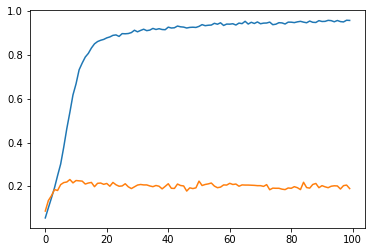

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 0.2 dropout

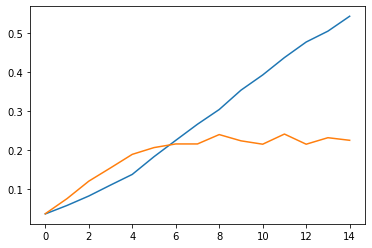

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 0.5 dropout

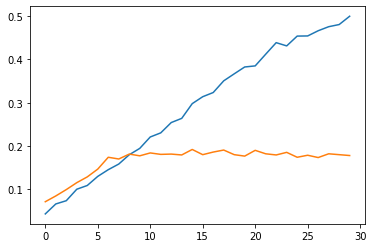

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 0.65 dropout

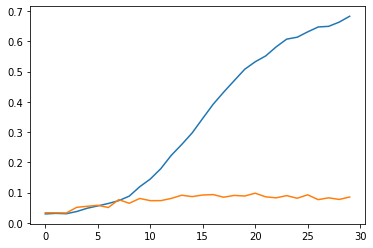

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 0.5 dropout and new kernel size
# old was 5,4,3
# new is  3,6,8

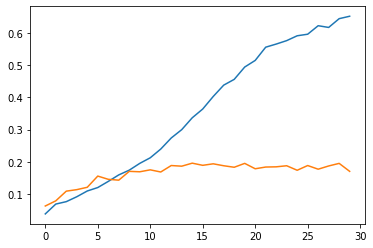

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 0.5 dropout and new kernel size
# old was 3,6,8
# new is  2,4,6

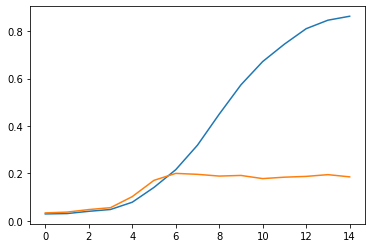

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 0.5 dropout & increased model complexity

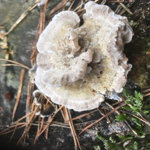

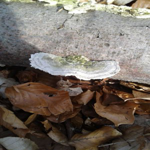

In [6]:
from PIL import Image
new_img = Image.fromarray((X1_train[2]*255).astype(np.uint8))
new_img.show()
new_img = Image.fromarray((X2_train[2]*255).astype(np.uint8))
new_img.show()